In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_json("coin_list.json")
BTC = pd.read_json("BTC.json")
ETH = pd.read_json("ETH.json")
BCH = pd.read_json("BCH.json")
DOGE = pd.read_json("DOGE.json")
ADA = pd.read_json("ADA.json")
SOL = pd.read_json("SOL.json")
SHIB = pd.read_json("SHIB.json")
LDO = pd.read_json("LDO.json")
GRT = pd.read_json("GRT.json")
PEPE = pd.read_json("PEPE.json")

In [8]:
'''Se realiza la conversión de los datos para dejarlos com series de tiempo, dejando la fecha UNIX
en formato de día mes y año'''
def t_API_coingecko(dataframe):
    dataframe[["date","prices"]] = (dataframe.prices.apply(pd.Series))
    dataframe["market_caps"] = (dataframe.market_caps.apply(pd.Series)[1])
    dataframe["total_volumes"] = (dataframe.total_volumes.apply(pd.Series)[1])
    dataframe = dataframe[["date", "prices", "market_caps", "total_volumes"]]
    dataframe["date"] = dataframe["date"].astype(str).apply(lambda x: x[0:10])
    dataframe["date"] = dataframe["date"].astype(int)
    dataframe["date"] = pd.to_datetime(dataframe["date"], unit='s')
    dataframe["date"] = dataframe["date"].dt.strftime("%Y-%m-%d")
    dataframe = dataframe.fillna("0")
    return dataframe


In [9]:
'''Se procesan los 10 dataframes por medio de un ciclo for dejando una lista da datafarmes
en la variable "df_procesados'''
lista_cryptos = [BTC, ETH, BCH, DOGE,ADA, SOL, SHIB, LDO, GRT, PEPE]
df_procesados = []
for df in lista_cryptos:
    df_convertido = t_API_coingecko(df)
    df_procesados.append(df_convertido)

In [10]:
'''Se exportan los dataframes anidados en el orden de la lista "lista_cryptos", es decir 0.csv
pertenece a BTC'''
df_exportados = []
for idx, df in enumerate(df_procesados):
    csv= f"Cryptos_csv/{idx}.csv"
    df.to_csv(csv, index = False)
    df_exportados.append(csv)

10 cryptos con mejor retorno en el 2023
https://finbold.com/top-10-crypto-assets-by-returns-in-2023/

In [11]:
#df[df["symbol"].str.contains("pepe")]

## --------- EXPLORATORY DATA ANALYISIS -----------

In [12]:
BTC = pd.read_csv("Cryptos_csv/BTC.csv")
ETH = pd.read_csv("Cryptos_csv/ETH.csv")
BCH = pd.read_csv("Cryptos_csv/BCH.csv")
DOGE = pd.read_csv("Cryptos_csv/DOGE.csv")
ADA = pd.read_csv("Cryptos_csv/ADA.csv")
SOL = pd.read_csv("Cryptos_csv/SOL.csv")
SHIB = pd.read_csv("Cryptos_csv/SHIB.csv")
LDO = pd.read_csv("Cryptos_csv/LDO.csv")
GRT = pd.read_csv("Cryptos_csv/GRT.csv")
PEPE = pd.read_csv("Cryptos_csv/PEPE.csv")

In [13]:
#Revisamos fechas para observar fechas de análisis de cada una de las 10 cryptomonedas elegidas
lst = ["BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"]
fechasdf = pd.DataFrame(columns = ["Fechas","BTC", "ETH", "BCH", "DOGE","ADA", "SOL", "SHIB", "LDO", "GRT", "PEPE"])
fechasdf.Fechas = ["min"]
for idx, i in enumerate(lst):
    minimo = df_procesados[idx]["date"].min()
    fechasdf[i] = [minimo]

x=fechasdf.to_numpy().tolist().pop(0)
del x[0]

<BarContainer object of 10 artists>

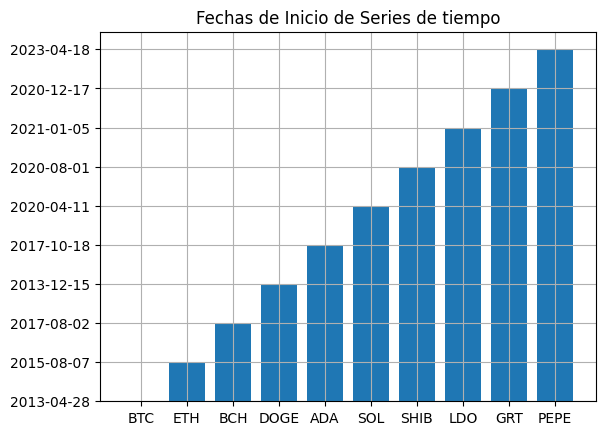

In [14]:
plt.grid(True)
plt.title('Fechas de Inicio de Series de tiempo')
plt.bar(lst,x)


Se observa que dentro de las 10 cryptomonedas su fecha de registro en coingecko varía desde el año 2013 para el BTC que es la primer cryptomoneda hasta el presente año que es la criptomoneda PEPE que ha figurado en muchas noticias ya que a pesar de ser una 'memecoin' ha tenido un incremento en su precio importante que vamos a ver ahora.

Se calcula la variación porcentual diaria, un valor porcentual negativo significa disminución del precio con respecto al día anterior, valor positivo aumento. Para dar perspectiva de los datos de variación porcentual diaria de las cryptos en comparación con la bolsa "tradcional" tomando la acción de [Amazon](https://es.investing.com/equities/amazon-com-inc-historical-data) en cuanto a variación porcentual diaría en el último mes su variación porcentual diaria no llega ni al 2.0%, en el caso de una acción de una empresa relevante como [Bancolombia](https://es.investing.com/equities/bcolombia-historical-data) su variación diaria porcentual en los últimos 30 días sube al 3.45% pero en promedio la variación es del 1.3% en creicmiento o decrecimiento.

In [15]:
#Se calcula la variación porcentual diaria, un valor porcentual negativo significa disminución d
PEPE["v_porcentual_d"] = PEPE["prices"].pct_change() * 100
PEPE.loc[0, "v_porcentual_d"] = 0

In [16]:
PEPE.head()

,date,prices,market_caps,total_volumes,v_porcentual_d
0,2023-04-18,1.901220e-07,0.000000e+00,7.231215e+07,0.000000
1,2023-04-19,1.901220e-07,0.000000e+00,7.231215e+07,0.000000
2,2023-04-20,2.487980e-07,1.038897e+08,1.352704e+08,30.862288
3,2023-04-21,3.043400e-07,1.290953e+08,9.738934e+07,22.324134
4,2023-04-22,1.993080e-07,8.356274e+07,7.811382e+07,-34.511402


In [17]:
for idx, i in enumerate(PEPE["prices"]):
    PEPE["v_porcentual_d"] = ((PEPE["prices"][idx+1]) - (PEPE["prices"][idx]))/PEPE["prices"][idx]


KeyError: 123

In [ ]:
PEPE["v_porcentual_d"] = 0

KeyError: 'v_porcentual_d'

In [ ]:
for idx, i in enumerate(PEPE["prices"]):
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


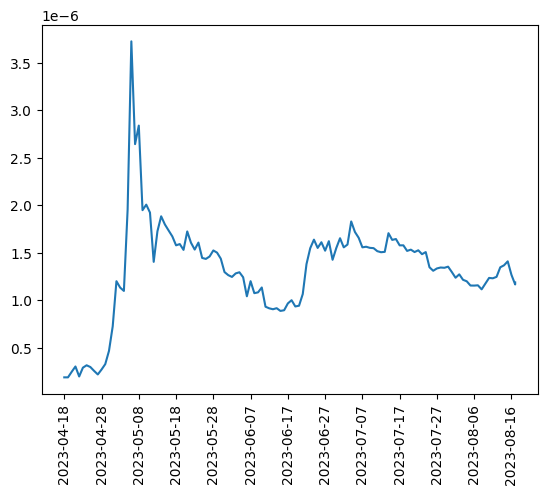

In [ ]:
x = PEPE.date
y = PEPE.prices

fig, ax = plt.subplots()
plt.xticks(rotation=90)
x_ticks = np.arange(0,250,10)
ax.set_xticks(x_ticks)
plt.plot(x,y)